# Projeto de Análise da Poluição do Ar no Mundo

## Introdução
Neste projeto de ciência de dados, exploraremos dados relacionados à poluição do ar em todo o mundo. A planilha utilizada contém informações sobre diferentes países e seus níveis de poluição do ar.

## Objetivo
O objetivo principal é analisar padrões de poluição do ar, identificar tendências e visualizar dados significativos que possam proporcionar insights sobre a situação global da qualidade do ar. Fazer também a criação de um ranking, contendo os 20 paises que mais poluiram no mundo e outro ranking com os 20 paises que menos poluiram.

## Conjunto de Dados
Os dados foram coletados de fontes confiáveis e estão disponíveis na planilha fornecida. A primeira etapa é carregar e explorar esses dados para entender melhor as variáveis envolvidas.


In [255]:
#para começar o nosso projeto de analise de dados sobre a poluição do ar, vamos importar as bibliotecas que vamos utilizar.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
#agora vamos chamar o nosso arquivo csv e armazenar em uma variavel (nome do arquivo.csv: air_pollution.csv)
tabela = pd.read_csv("air_pollution.csv")
display(tabela)

,city,country,2017,2018,2019,2020,2021,2022,2023
0,Kabul,Afghanistan,0,61.8,58.8,46.5,37.5,17.1,18.1
1,Tirana,Albania,0,0,0,16.0,12.5,14.5,14.4
2,Algiers,Algeria,0,0,21.2,20.2,20.0,17.8,17.4
3,Ordino,Andorra,0,0,0,7.4,7.3,5.4,5.3
4,Luanda,Angola,0,0,15.9,13.0,11.0,8.8,8.7
...,...,...,...,...,...,...,...,...,...
6980,Thanh Pho Lang Son,Vietnam,0,0,0,0,36.8,14.6,15.0
6981,Thu Duc,Vietnam,0,0,0,0,20.1,24.5,24.5
6982,Tra Vinh,Vietnam,0,0,0,0,6.2,5.5,5.5
6983,Trang Bang,Vietnam,0,0,0,0,0,12.9,12.4


In [257]:
#agora vamos usar o info para saber mais informações sobre os nossos dados
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6985 entries, 0 to 6984
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     6985 non-null   object
 1   country  6985 non-null   object
 2   2017     6985 non-null   object
 3   2018     6985 non-null   object
 4   2019     6985 non-null   object
 5   2020     6985 non-null   object
 6   2021     6985 non-null   object
 7   2022     6985 non-null   object
 8   2023     6985 non-null   object
dtypes: object(9)
memory usage: 491.3+ KB


In [258]:
#vamos agora para a parte do tratamento dos dados. Como vamos fazer uma análise global, não vamos precisar da coluna cidade e nem da coluna 2017
#pois os dados dela estão zerados. Então vamos apagar essas colunas.

tabela = tabela.drop("city", axis=1)
tabela = tabela.drop("2017", axis=1)
tabela = tabela.dropna()
display(tabela)

,country,2018,2019,2020,2021,2022,2023
0,Afghanistan,61.8,58.8,46.5,37.5,17.1,18.1
1,Albania,0,0,16.0,12.5,14.5,14.4
2,Algeria,0,21.2,20.2,20.0,17.8,17.4
3,Andorra,0,0,7.4,7.3,5.4,5.3
4,Angola,0,15.9,13.0,11.0,8.8,8.7
...,...,...,...,...,...,...,...
6980,Vietnam,0,0,0,36.8,14.6,15.0
6981,Vietnam,0,0,0,20.1,24.5,24.5
6982,Vietnam,0,0,0,6.2,5.5,5.5
6983,Vietnam,0,0,0,0,12.9,12.4


In [259]:
#verificando na tabela country (que são os paises), sabemos que o nome de cada pais aparece varias vezes por que antes tinha cidade
#e cada cidade tem o pais mais de uma vez. Então agora, devemos agrupar os paises e somar os valores de cada um deles.
#de forma que ficará apenas um nome de cada pais e a soma dos valores de cada um deles.

tabela = tabela.groupby("country").sum()
display(tabela)

,2018,2019,2020,2021,2022,2023
country,,,,,,
Afghanistan,61.8,58.8,46.5,37.5,17.1,18.1
Albania,0,0,16.0,12.5,14.5,14.4
Algeria,0,21.2,20.2,20.0,17.8,17.4
Andorra,0,0,7.4,7.3,5.4,5.3
Angola,0,15.9,13.0,11.0,8.8,8.7
...,...,...,...,...,...,...
Uruguay,0,0,0,14.2,11.3,11.3
Uzbekistan,34.3,41.2,29.9,42.8,33.5,31.9
Venezuela,0,0,0,5.4,4.4,4.5


In [260]:
#Parece que estamos enfrentando dificuldades para converter os valores para float devido a uma complexidade nos dados, 
#especialmente na coluna "Vietnam". Podemos tentar uma abordagem mais específica para essa coluna e tentar corrigir os valores de forma mais precisa.

# Corrigir todas as colunas, substituindo vírgulas por pontos e convertendo para float
tabela.iloc[:, 1:] = tabela.iloc[:, 1:].replace({',': '.'}, regex=True).apply(pd.to_numeric, errors='coerce')

# Exibir as primeiras linhas da tabela após a correção
display(tabela)

,2018,2019,2020,2021,2022,2023
country,,,,,,
Afghanistan,61.8,58.8,46.5,37.5,17.1,18.1
Albania,0,0.0,16.0,12.5,14.5,14.4
Algeria,0,21.2,20.2,20.0,17.8,17.4
Andorra,0,0.0,7.4,7.3,5.4,5.3
Angola,0,15.9,13.0,11.0,8.8,8.7
...,...,...,...,...,...,...
Uruguay,0,0.0,0.0,14.2,11.3,11.3
Uzbekistan,34.3,41.2,29.9,42.8,33.5,31.9
Venezuela,0,0.0,0.0,5.4,4.4,4.5


In [261]:
# Substituir NaN por 0 em toda a tabela
tabela = tabela.fillna(0)

# Agora, vamos colocar apenas 1 casa decimal nos valores da tabela
pd.options.display.float_format = "{:.1f}".format

# Exibindo a tabela atualizada
display(tabela)


,2018,2019,2020,2021,2022,2023
country,,,,,,
Afghanistan,61.8,58.8,46.5,37.5,17.1,18.1
Albania,0,0.0,16.0,12.5,14.5,14.4
Algeria,0,21.2,20.2,20.0,17.8,17.4
Andorra,0,0.0,7.4,7.3,5.4,5.3
Angola,0,15.9,13.0,11.0,8.8,8.7
...,...,...,...,...,...,...
Uruguay,0,0.0,0.0,14.2,11.3,11.3
Uzbekistan,34.3,41.2,29.9,42.8,33.5,31.9
Venezuela,0,0.0,0.0,5.4,4.4,4.5


In [262]:
#vamos repassar as informações da tabela para verificação
tabela.info()


<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, Afghanistan to Zambia
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2018    133 non-null    object 
 1   2019    133 non-null    float64
 2   2020    133 non-null    float64
 3   2021    133 non-null    float64
 4   2022    133 non-null    float64
 5   2023    133 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.3+ KB


In [263]:
#Percebi que a coluna "2018" ainda está como tipo object. Vamos corrigir isso para garantir que todos os valores numéricos sejam do tipo adequado.
#Vamos realizar a conversão da coluna "2018" para o tipo float.

# Remover pontos da coluna "2018" e converter para o tipo float
tabela['2018'] = tabela['2018'].replace('[^\\d.]', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Exibindo novamente a tabela
display(tabela)
tabela.info()




,2018,2019,2020,2021,2022,2023
country,,,,,,
Afghanistan,61.8,58.8,46.5,37.5,17.1,18.1
Albania,0.0,0.0,16.0,12.5,14.5,14.4
Algeria,0.0,21.2,20.2,20.0,17.8,17.4
Andorra,0.0,0.0,7.4,7.3,5.4,5.3
Angola,0.0,15.9,13.0,11.0,8.8,8.7
...,...,...,...,...,...,...
Uruguay,0.0,0.0,0.0,14.2,11.3,11.3
Uzbekistan,34.3,41.2,29.9,42.8,33.5,31.9
Venezuela,0.0,0.0,0.0,5.4,4.4,4.5


<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, Afghanistan to Zambia
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2018    88 non-null     float64
 1   2019    133 non-null    float64
 2   2020    133 non-null    float64
 3   2021    133 non-null    float64
 4   2022    133 non-null    float64
 5   2023    133 non-null    float64
dtypes: float64(6)
memory usage: 7.3+ KB


## Agora que finalizamos o tratamento dos dados, vamos começar a análise

In [264]:
#agora que já temos nossos dados tratados, vamos criar uma outra tabela, que vamos chamar de valor_total,
#que vai ser a soma de todos os valores de cada pais, de forma que teremos apenas um valor para cada pais.

# Criar a tabela 'valor_total' somando os valores de cada país ao longo dos anos
valor_total = tabela.sum(axis=1)

# Converter a Series resultante de volta para um DataFrame com uma coluna
valor_total = valor_total.reset_index(name='Total')

# Exibir a nova tabela
display(valor_total)



,country,Total
0,Afghanistan,239.8
1,Albania,57.4
2,Algeria,96.6
3,Andorra,25.4
4,Angola,57.4
...,...,...
128,Uruguay,36.8
129,Uzbekistan,213.6
130,Venezuela,14.3
131,Vietnam,0.0


In [265]:
#agora que ja temos o pais e o total de poluição dele ao longo dos anos, vamos organizar a tabela de forma decrescente, do mais poluidor para o menor.

valor_total = valor_total.sort_values(by='Total', ascending=False)
display(valor_total)

,country,Total
11,Bangladesh,467.3
10,Bahrain,329.8
23,Chad,258.4
0,Afghanistan,239.8
129,Uzbekistan,213.6
...,...,...
95,Portugal,0.0
44,Greece,0.0
98,Romania,0.0
99,Russia,0.0


## Vamos começar a criar alguns graficos para entender melhor toda a situação.

## TOP 10 Paises mais poluidos do mundo.

<Axes: xlabel='Total', ylabel='country'>

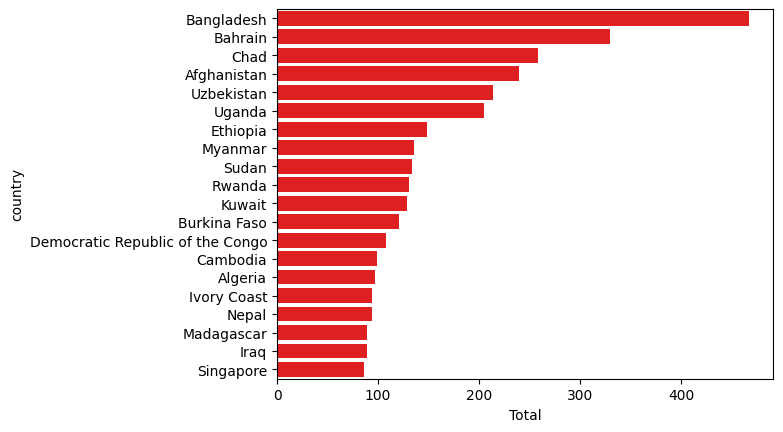

In [266]:
#agora vamos criar um grafico de barras horizontal para visualizar melhor os dados.
#vamos pegar os top 20 paises mais poluidos do mundo e criar um grafico de barras horizontal.

# Criar um gráfico de barras horizontal com os 20 países mais poluídos
sns.barplot(data=valor_total.head(20), x='Total', y='country', color='red')


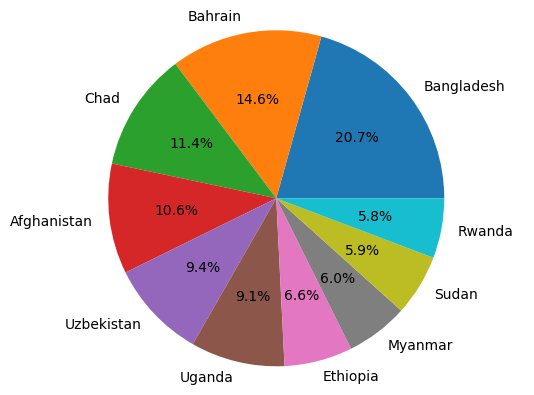

In [267]:
#criando um grafico dos 10 paises mais poluidores do mundo
plt.pie(valor_total.head(10)['Total'], labels=valor_total.head(10)['country'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()


## Com essa análise conseguimos tirar alguns insights dos paises que mais poluem no mundo todo.

Bangladesh, Bahrein, Chade, Afeganistão, Uzbequistão, Uganda, Etiópia, Mianmar, Sudão, Ruanda, Kuwait, Burkina Faso, República Democrática do Congo, Camboja, Argélia, Costa do Marfim, Nepal, Madagascar, Iraque, Singapura, entre outros.

Podemos observar:

## Diversidade Geográfica:

Os países listados estão distribuídos em diversas regiões geográficas, incluindo África, Ásia e Oriente Médio.

## Desenvolvimento Econômico Variado:

A lista abrange países com diferentes níveis de desenvolvimento econômico, desde nações em desenvolvimento até economias mais avançadas, como Singapura.

## Causas Diversas de Emissões:

As razões para as emissões variam e podem incluir fatores como industrialização, crescimento populacional, atividades agrícolas, entre outros.

## Necessidade de Análise Detalhada:

Para compreender melhor as emissões e identificar padrões específicos, é necessário realizar uma análise mais detalhada, considerando dados setoriais e outros indicadores.

## Impacto total no planeta.

Vamos agora somar todos os dados para estimar o impacto total de todos os paises ao redor do globo.

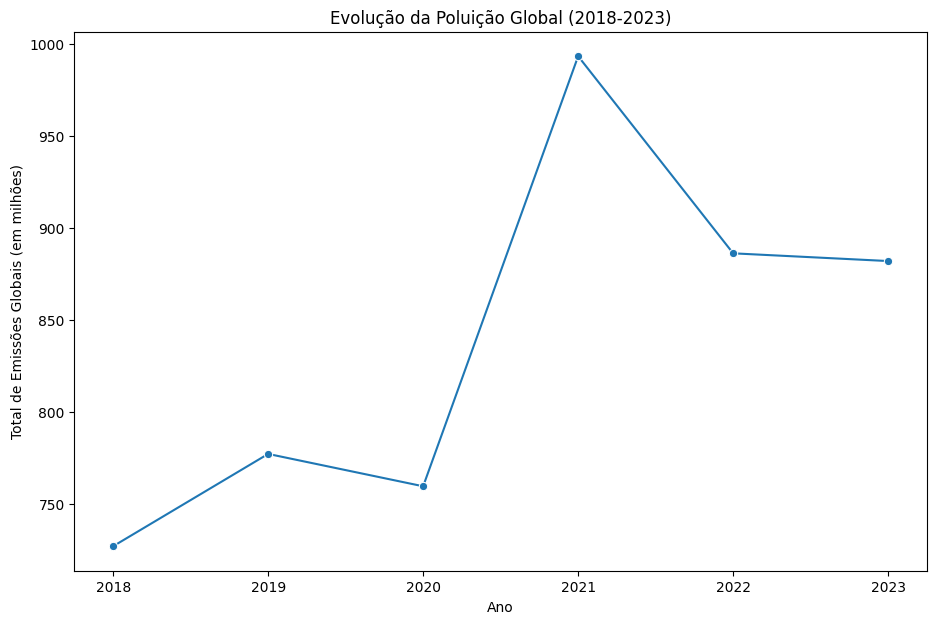

In [268]:
#agora vamos somar o valor total de todos os paises que poluiram, vamos somar por anos.
#somar os anos de 2018, 2019, 2020, 2021, 2022, 2023
#depois criar um grafico de linha, para mostrar a evolução da poluição ao longo dos anos.

# Somar o valor total de emissões por ano
soma_por_ano = tabela[['2018', '2019', '2020', '2021', '2022', '2023']].sum()

# Configurar o tamanho do gráfico
plt.figure(figsize=(11, 7))

# Criar um gráfico de linha para a evolução da poluição ao longo dos anos
sns.lineplot(x=soma_por_ano.index, y=soma_por_ano.values, marker='o')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Total de Emissões Globais (em milhões)')
plt.title('Evolução da Poluição Global (2018-2023)')

# Exibir o gráfico
plt.show()


# Análise da Evolução da Poluição Global (2018-2023)

A análise do gráfico revela padrões notáveis na evolução das emissões globais ao longo dos anos.

### 2018: Iniciou-se com um pico global relativamente menor, sugerindo uma estabilidade inicial nas emissões.

### 2019: Experimentou um leve aumento em comparação com o ano anterior, indicando um possível crescimento nas atividades poluentes.

### 2020: Testemunhou uma pequena queda na poluição global, provavelmente devido a eventos ou mudanças significativas nas atividades econômicas.

### 2021: Destaca-se por um pico gigantesco nas emissões, levantando questões sobre os eventos ou fatores que impulsionaram esse aumento significativo.

### 2022 e 2023: Embora as emissões tenham permanecido elevadas, observou-se uma diminuição em relação ao ano de 2021, sugerindo possíveis esforços para conter o crescimento descontrolado.